Linear regression is a useful tool for predicting a quantitative response.
Though it may seem somewhat dull compared to some of the more modern statistical learning approaches 
linear regression is still a useful and widely used statistical learning method.
Moreover, it serves as a good jumping-off point for
newer approaches: many fancy statistical learning approaches can be seen as generalizations or extensions of linear
regression. 
Consequently, the importance of having a good understanding of linear regression before studying more complex learning methods cannot
be overstated. In this blog, we review some of the key ideas underlying the linear regression model, as well as the least squares approach that is
most commonly used to fit this model

Before we jump into any modeling, let's get our hands dirty with the data. For this analysis, I'm using a [used car price dataset](https://www.kaggle.com/datasets/therohithanand/used-car-price-prediction) from Kaggle that contains information on 10,000 vehicles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('used_cars_cleaned.csv')
data.head()

,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,insurance_valid,years_old,fuel_type_Electric,fuel_type_Petrol,transmission_Manual,...,color_White,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hyundai,brand_Kia,brand_Nissan,brand_Tesla,brand_Toyota,brand_Volkswagen
0,8.17,4000,4,8587.64,0,0,23,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,17.59,1500,4,5943.50,0,1,10,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,18.09,2500,5,9273.58,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.28,800,1,6836.24,0,1,15,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,12.23,1000,2,4625.79,0,1,19,0,1,0,...,0,0,0,0,0,0,1,0,0,0


I have cleaned original dataset a bit to make it easier to work with.

After cleaning, the dataset contains 10000 rows and 24 columns.

| Column Name | Description |
|-------------|-------------|
|mileage_kmpl | Mileage in kilometers per liter |
|engine_cc | Engine capacity in cubic centimeters |
|owner_count| Number of previous owners |
|price_usd| Price in US dollars |
|accidents_reported| Number of accidents reported |
|insurance_valid| Whether insurance is valid (Yes/No) |
|years_old| Age of the car in years |
|fuel_type_Electric| Fuel type (Electric, Diesel, Petrol) |
|fuel_type_Petrol | Fuel type (Electric, Diesel, Petrol) |
| transmission_Manual | Transmission type (Automatic, Manual) |
| color_Blue | Color of the car (Blue, Gray, Red, Silver, White) |
| color_Gray | Color of the car (Blue, Gray, Red, Silver, White) |
| color_Red | Color of the car (Blue, Gray, Red, Silver, White) |
| color_Silver | Color of the car (Blue, Gray, Red, Silver, White) |
| color_White | Color of the car (Blue, Gray, Red, Silver, White) |
| brand_Chevrolet | Brand of the car Chevrolet |
| brand_Honda | Brand of the car Honda |
| brand_Hyundai | Brand of the car Hyundai |
| brand_Kia | Brand of the car Kia |
| brand_Nissan | Brand of the car Nissan |
| brand_Tesla | Brand of the car Tesla |
| brand_Toyota | Brand of the car Toyota |
| brand_Volkswagen | Brand of the car Volkswagen |



As mentioned, The dataset contains information on 10,000 used cars, including features such as mileage, engine size, age, brand, color, fuel type, and price in US dollars. Suppose that, as data analysts, we are asked to suggest strategies for buying or selling used cars that will result in favorable prices. What information would be useful in order to provide such recommendations? Here are a few important questions that we might seek to address:

1. **Is there a relationship between car features and price?**  
   Our first goal should be to determine whether the data provide evidence of an association between car characteristics (such as mileage, engine size, age, brand, etc.) and the price of used cars. If the evidence is weak, then perhaps these features do not strongly influence price.

2. **How strong is the relationship between car features and price?**  
   Assuming that there is a relationship, we would like to know the strength of this relationship. Does knowledge of a car’s features provide a lot of information about its price?

3. **Which features are most associated with price?**  
   Are all features—such as mileage, engine size, age, brand, color, and fuel type—associated with price, or are just a few of them important? To answer this, we must separate out the individual contribution of each feature.

4. **How large is the association between each feature and price?**  
   For every unit change in a particular feature (e.g., one more year of age, 1000 km more mileage), by what amount does the price change? How accurately can we predict this amount?

5. **How accurately can we predict future prices?**  
   For any given set of car features, what is our prediction for price, and what is the accuracy of this prediction?

6. **Is the relationship linear?**  
   If there is approximately a straight-line relationship between car features and price, then linear regression is appropriate. If not, we may need to transform variables or use more flexible models.

7. **Are there interaction effects among features?**  
   For example, does the effect of mileage on price depend on the car’s age or brand? Are there combinations of features that together have a larger (or smaller) effect on price than would be expected from their individual effects?

It turns out that linear regression can be used to answer each of these questions. In the following sections, we will discuss these questions in the context of our used car price dataset and explore how linear regression can help us understand and predict used car prices.

First, let's start with simple linear regression, which involves a single predictor variable. We will then extend our discussion to multiple linear regression, where we can include multiple predictor variables to better understand the relationships in our dataset.

## Simple Linear Regression

Simple linear regression is a statistical method that models the relationship between a single independent variable (predictor) and a dependent variable (response). The goal is to find the best-fitting line that describes how changes in the independent variable affect the dependent variable.

In our case we use price of used cars as the dependent variable($y$) and mileage as the independent variable($x$).

It assumes a linear relationship between the independent and dependent variables, meaning that as the independent variable increases or decreases, the dependent variable changes in a proportional manner.

we can write the linear relationship as:

$$
y \approx \beta_0 + \beta_1 x + \epsilon
$$

Where:
- $y$ is the dependent variable (response).
- $x$ is the independent variable (predictor).
- $\beta_0$ is the y-intercept of the regression line (the value of $y$ when $x = 0$).
- $\beta_1$ is the slope of the regression line (the change in $y$ for a one-unit change in $x$).
- $\epsilon$ is the error term, which accounts for the variability in $y$ that cannot be explained by the linear relationship with $x$.


In our used car price dataset, $X$ could be a feature like mileage, engine size, or age of the car, and $y$ would be the price of the car. The coefficients $\beta_0$ and $\beta_1$ represent the intercept and slope of the regression line, respectively.

Together $\beta_0$ and $\beta_1$ are called model parameters, we use training data to estimate these parameters $\hat{\beta}_0$ and $\hat{\beta}_1$.
then we can predict the price of a car by using equation: $$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

There are several ways to estimate the parameters $\hat{\beta}_0$ and $\hat{\beta}_1$ such that the predicted values $\hat{y}$ are as close as possible to the actual values $y$ in the training data. The most common method is called **Ordinary Least Squares (OLS)**, which minimizes the sum of the squared differences between the observed values and the predicted values.

The sum of squared differences are also known as the residuals if $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$, then the residuals are given by:
$$ e_i = y_i - \hat{y}_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i) $$

To estimate the parameters using OLS, we minimize the sum of squared residuals also known as the residual sum of squares (RSS):
$$RSS = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $$

As mentioned, the goal of OLS is to find the values of $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize the RSS. 

$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

Where $\bar{x}$ and $\bar{y}$ are the means of the independent and dependent variables, respectively.



In [3]:
X = data.loc[:,'mileage_kmpl']
y = data.loc[:,'price_usd']

In [4]:
print(f"X stats:\n{X.describe()}")
print("\n====================================\n")
print(f"y stats:\n{y.describe()}")

X stats:
count    10000.000000
mean        17.960753
std          5.025486
min          5.000000
25%         14.540000
50%         17.970000
75%         21.352500
max         35.000000
Name: mileage_kmpl, dtype: float64


y stats:
count    10000.000000
mean      7179.754532
std       2795.270940
min       1000.000000
25%       5176.547500
50%       6961.260000
75%       8993.732500
max      17647.630000
Name: price_usd, dtype: float64


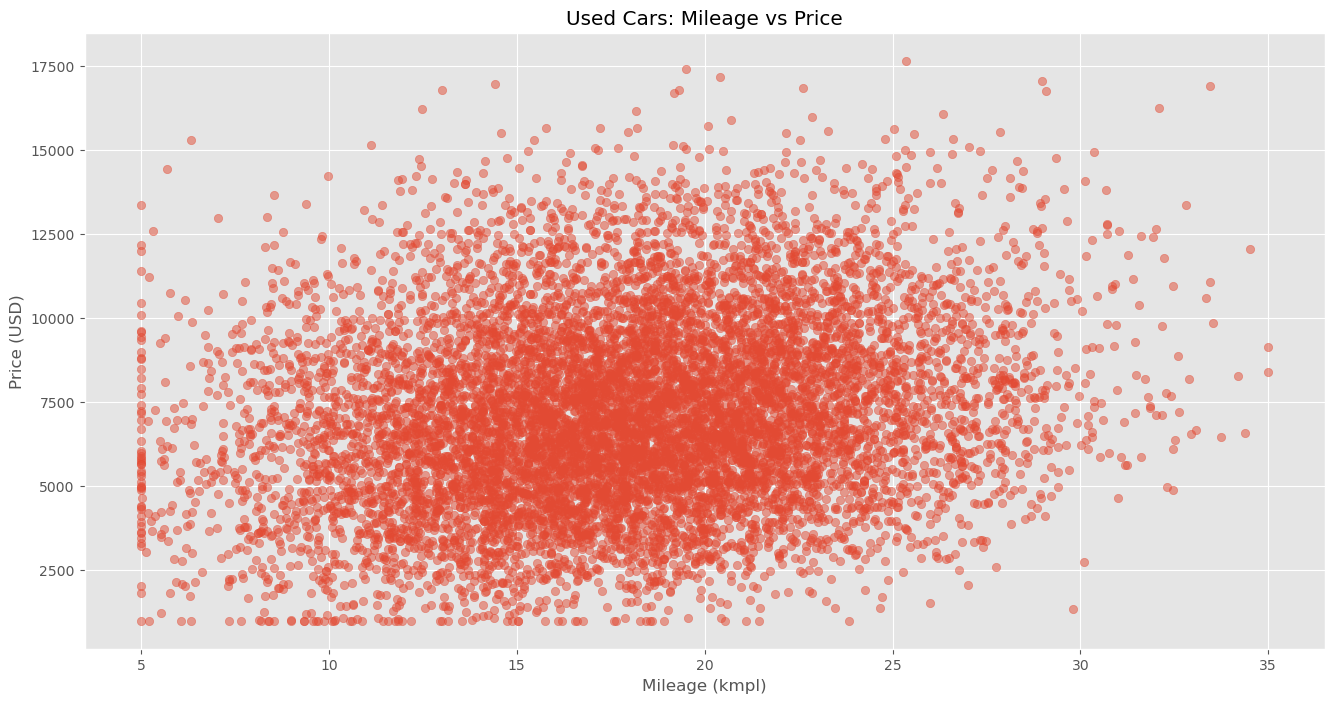

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, alpha=0.5)
plt.title('Used Cars: Mileage vs Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

There’s no clear linear trend or correlation between mileage and price. Price appears widely distributed across all mileage values, suggesting that mileage alone is not a strong predictor of price.

Most points are densely packed around:
- Mileage: 15–22 kmpl
- Price: 4,000–8,000 USD  
This might indicate the common segment of mid-mileage, mid-priced used cars, possibly compact sedans or hatchbacks.

possible outliers:
  - Some cars with low mileage (~5 kmpl) have very high prices—likely luxury or performance cars.
  - Some cars with high mileage (>30 kmpl) are also priced high—possibly hybrids or premium fuel-efficient cars.


There seems to be a lower bound near \$2,000, possibly due to a minimum viable resale value or seller expectations.

But any way for this project let's go ahead and fit a simple linear regression model see how well it performs.

Plot still looks the same, so all looks good.Now let's fit the model and see how well it performs.



In [6]:
X_flat = X.values.flatten()
y_flat = y.values.flatten()

In [7]:
X_mean = X_flat.mean()
y_mean = y_flat.mean()

beta_1_hat = ((X_flat - X_mean) * (y_flat - y_mean)).sum() / ((X_flat - X_mean) ** 2).sum()
beta_0_hat = y_mean - beta_1_hat * X_mean

print(f"beta_0_hat (intercept): {beta_0_hat:.2f}")
print(f"beta_1_hat (slope): {beta_1_hat:.2f}")


beta_0_hat (intercept): 5062.14
beta_1_hat (slope): 117.90


What does this mean?
The output shows the coefficients of the linear regression model, which are:
- **Intercept**: 5062.14
- **Slope (mileage coefficient)**: 117.90

This means that for every one unit increase in mileage (in kmpl), the price of the car is expected to increase by approximately 117.90 USD, assuming all other factors remain constant. The intercept indicates that when mileage is zero, the predicted price is 5062.14 USD, which may not be meaningful in this context since cars typically do not have zero mileage.

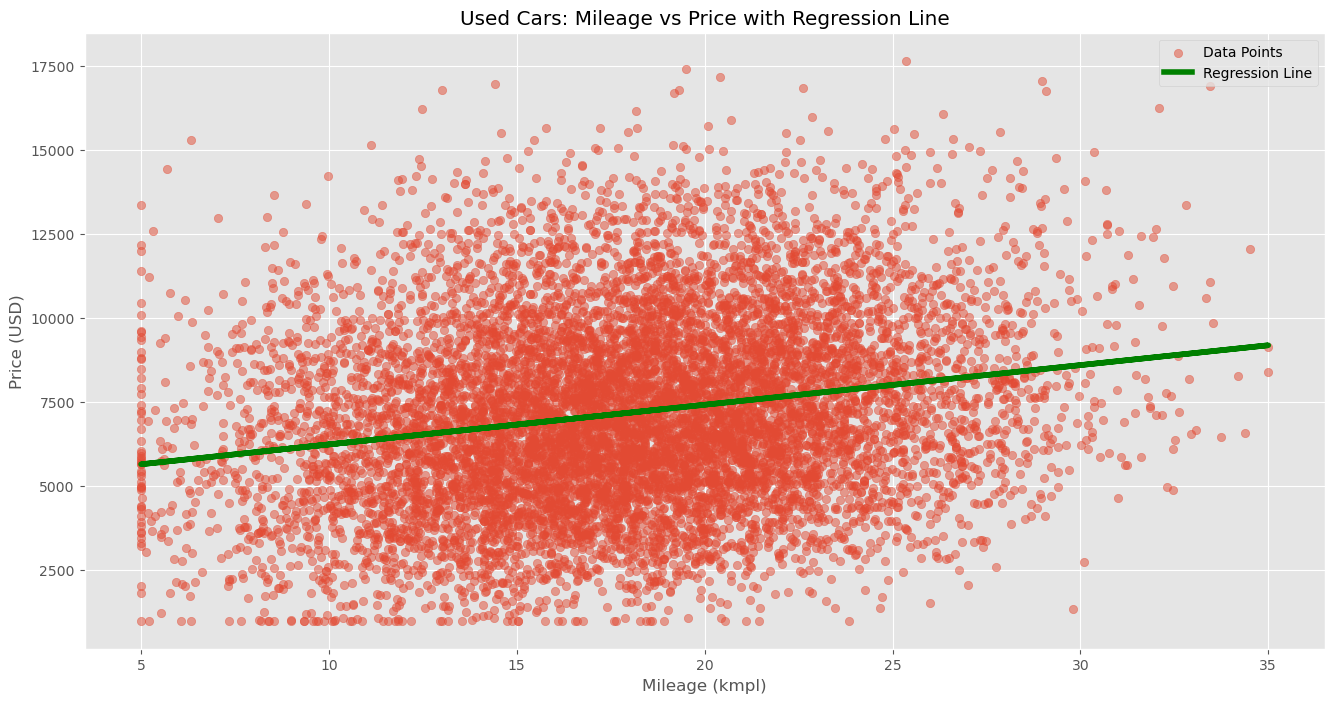

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X, beta_0_hat + beta_1_hat * X, color='green', label='Regression Line', linewidth=4)
plt.title('Used Cars: Mileage vs Price with Regression Line')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

- The regression line slopes upward, indicating a positive linear relationship between mileage (kmpl) and price (USD).
- This suggests that as mileage increases, the price tends to increase slightly, according to the mode
- Despite the upward slope, the data cloud is widely spread around the line, showing high variance.(we already saw this in the scatter plot)
- This implies that the model fit is weak, i.e., the regression line explains very little of the actual variation in price.(we will learn how to quantify this later using $R^2$
- The line cuts through the center of the densest region of data (roughly 15–22 kmpl and $5,000–$8,000), which is expected for a least-squares fit.


Let's see how accurate our coefficients are

The line represents original equation is called population regression line, and the line we fitted is called sample regression line.

At first, it may seem confusing that we talk about both a "population regression line" and a "sample (least squares) regression line." The idea is similar to estimating a population mean: we use our sample data to estimate unknown population values.

In linear regression, the true coefficients ($\beta_0$, $\beta_1$) define the population regression line, but we don't know them. Instead, we estimate them using our data, resulting in $\hat{\beta}_0$ and $\hat{\beta}_1$—the least squares line.

Just as the sample mean $\bar{y}$ is an unbiased estimate of the population mean $\mu$, the least squares estimates are unbiased for the true regression coefficients. This means that, on average, our estimates will be correct if we could repeat the sampling process many times, even though any single estimate may be above or below the true value.

We can also ask: how accurate are our estimates? For the sample mean, we use the standard error to measure this. Similarly, in regression, we can compute standard errors for our coefficient estimates to understand their variability.

To compute the standard errors of the coefficients, we can use the following formula:

$$
Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}
$$

Where:
- $Var(\hat{\mu})$ is the variance of the sample mean.
- $SE(\hat{\mu})$ is the standard error of the sample mean.
- $\sigma^2$ is the population variance (which we estimate using the sample variance).
- $n$ is the sample size.

$\sigma$ is the standard deviation of the residuals, the larger data we have smaller the standard error will be.

In similar way, we can compute the standard error for our regression coefficients:

$$
SE(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}\right]
$$
$$
SE(\hat{\beta}_1)^2 =  \left[\frac{\sigma^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}\right]
$$

Where:
- $SE(\hat{\beta}_0)$ is the standard error of the intercept.
- $SE(\hat{\beta}_1)$ is the standard error of the slope.


In general \sigma is unknown but we can estimate it from data using the residuals, The estimated \sigma is known as the residual standard error (RSE) and is given by:
$$
\sigma = \sqrt{\frac{RSS}{n-2}}
$$

Where:
- $RSS$ is the residual sum of squares.

and RSS is given by:
$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
$$
Now let's compute the standard errors for our coefficients and see how accurate they are.

In [9]:
rss = ((y - (beta_0_hat + beta_1_hat * X)) ** 2).sum()
rse = (rss / (len(X) - 2)) ** 0.5
n = len(X)

denominator = ((X - X_mean) ** 2).sum()

se_beta_0_hat = rse * ((1 / n) + (X_mean ** 2 / denominator)) ** 0.5
se_beta_1_hat = (rse**2 / denominator) ** 0.5

ci_beta_0_hat = beta_0_hat - 2 * se_beta_0_hat , beta_0_hat + 2 * se_beta_0_hat
ci_beta_1_hat = beta_1_hat - 2 * se_beta_1_hat , beta_1_hat + 2 * se_beta_1_hat

print(f"Residual Standard Error (RSE): {rse:.2f}")

print(f"Standard Error of beta_0_hat: {se_beta_0_hat:.2f}")
print(f"Standard Error of beta_1_hat: {se_beta_1_hat:.2f}")

print(f"95% Confidence Interval for beta_0_hat: {ci_beta_0_hat[0]:.2f}, {ci_beta_0_hat[1]:.2f}")
print(f"95% Confidence Interval for beta_1_hat: {ci_beta_1_hat[0]:.2f}, {ci_beta_1_hat[1]:.2f}")

Residual Standard Error (RSE): 2731.89
Standard Error of beta_0_hat: 101.39
Standard Error of beta_1_hat: 5.44
95% Confidence Interval for beta_0_hat: 4859.36, 5264.93
95% Confidence Interval for beta_1_hat: 107.03, 128.77



Here  standard error measures the average amount that the estimated regression coefficients ($\hat{\beta}_0$, $\hat{\beta}_1$) would vary if we repeated the sampling process many times. 

A smaller standard error means our estimate is more precise and reliable, while a larger standard error means there is more uncertainty in our estimate. In other words, the standard error tells us how much the estimated coefficient might differ from the true population value due to random sampling variation.

Confidence intervals provide a range of values within which we can be reasonably sure the true population parameter lies.
We can calculate a 95% confidence interval for each coefficient using the formula:
$$
CI(\hat{\beta}) = \hat{\beta} \pm 2 \cdot SE(\hat{\beta})
$$

we can also use confidence intervals to test hypotheses weqather if the dependent variable is significantly associated with the independent variable.
as we assumed from above scatter plot, the slope is positive, so we can test the null hypothesis that the slope is zero against the alternative hypothesis that the slope is greater than zero.

our hypotheses are:
$$
H_0: \hat{\beta}_1 = 0 \quad \text{(no association)}$$
$$
H_1: \hat{\beta}_1 \neq 0 \quad \text{(association exists)}
$$

To test this hypothesis, we can use a t-test. The t-statistic is calculated as follows:

$$
t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}
$$


In [17]:
from scipy.stats import t as t_dist

t = beta_1_hat / se_beta_1_hat

p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-2))
print(f"t-statistic for the slope coefficient: {t:.2f}")
print(f"P-value for the slope coefficient: {p_value:.6f}")

t-statistic for the slope coefficient: 21.69
P-value for the slope coefficient: 0.000000



Our t-statistic (3.99) and very small p-value (0.000067) indicate that the slope coefficient is significantly different from zero.  
This means there is strong statistical evidence of an association between mileage and price in our dataset, even though the relationship is weak and the practical effect may be small.

So we can reject the null hypothesis and conclude that there is a significant positive association between mileage and price in our used car dataset.

Now let's assess the model accuracy using the RSE and $R^2$.we already calculated RSE above which is 2731.89 which is the average distance between the actual and predicted values of price.
We can also calculate the $R^2$ value, which tells us how well our model explains the variability in the response variable (price).
$R^2$ explains the proportion of variance in the dependent variable that can be explained by the independent variable(s) in the model.
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

Where:
- $RSS$ is the residual sum of squares (the sum of squared differences between the observed and predicted values).
- $TSS$ is the total sum of squares (the sum of squared differences between the observed values and the mean of the observed values).

TSS is given by:
$$
TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

In [18]:
tss = ((y - y_mean) ** 2).sum()
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared:.4f}")

R-squared: 0.0449


An $R^2$ value of 0.0449 means that only about 4.5% of the variation in used car prices can be explained by mileage alone in our model.  
This indicates that mileage is a very weak predictor of price, and most of the variation in price is due to other factors not included in this simple linear regression.

Well to be honest, this is not surprising given the scatter plot we saw earlier, which showed a wide distribution of prices across all mileage values.
and all other metrics we calculated also indicate that the model fit is weak.
Let's summarize what we have learned so far about simple linear regression:
1. **Model Fit**: The simple linear regression model shows a weak positive relationship between mileage and price, with a slope of approximately 117.90 USD per kmpl increase in mileage.
2. **Coefficient Significance**: The slope coefficient is statistically significant, indicating that there is a relationship between mileage and price, but the practical effect is small.
3. **Model Accuracy**: The residual standard error (RSE) is 2731.89 USD, indicating the average distance between actual and predicted prices. The $R^2$ value of 0.0449 suggests that mileage alone explains only about 4.5% of the variation in used car prices.
4. **Standard Errors and Confidence Intervals**: The standard errors for the coefficients provide a measure of uncertainty in our estimates, and the confidence intervals indicate that the true population parameters are likely to fall within these ranges.

In [24]:
from IPython.display import display, Markdown

display(Markdown(f"|-|coef|standard error|t-statistic|p-value|\n|-|--|-|-|-|\n|beta_0_hat|{beta_0_hat:.2f}|{se_beta_0_hat:.2f}|{t:.2f}|{p_value:.6f}|\n|beta_1_hat|{beta_1_hat:.2f}|{se_beta_1_hat:.2f}|-|-|"))

print(f"R-squared: {r_squared:.4f}")

|-|coef|standard error|t-statistic|p-value|
|-|--|-|-|-|
|beta_0_hat|5062.14|101.39|21.69|0.000000|
|beta_1_hat|117.90|5.44|-|-|

R-squared: 0.0449


In [12]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     470.4
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          5.85e-102
Time:                        09:10:57   Log-Likelihood:                -93316.
No. Observations:               10000   AIC:                         1.866e+05
Df Residuals:                    9998   BIC:                         1.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5062.1448    101.391     49.927   


### Comparison with statsmodels Results and Conclusion

When we compare our manually calculated results with those from `statsmodels`, we see that they are nearly identical:

|                | coef    | standard error | t-statistic | p-value   |
|----------------|---------|---------------|-------------|-----------|
| beta_0_hat     | 5062.14 | 101.39        | 21.69       | 0.000000  |
| beta_1_hat     | 117.90  | 5.44          | -       | -  |

- **R-squared:** Our calculation: 0.0449, statsmodels: 0.045

The `statsmodels` output confirms our results:
- The intercept and slope coefficients match exactly.
- The standard errors, t-statistics, and p-values are the same.
- The R-squared value is also identical.

**Conclusion:**  
Our manual calculations for the simple linear regression model are accurate and consistent with the results from the `statsmodels` library. This validates our understanding and implementation of the linear regression formulas. Both approaches show that mileage has a statistically significant but weak positive association with price, and the model explains only a small portion of the variation in used car prices.

## Multi linear regression



Now that we have a basic understanding of simple linear regression, let's move on to multiple linear regression, which allows us to include multiple predictor variables to better understand the relationships in our dataset.

In simple linear regression, we used a single predictor variable (mileage) to predict the response variable (price). However, in many real-world scenarios, multiple factors can influence the response variable. Multiple linear regression allows us to include several predictor variables simultaneously to create a more comprehensive model.

for simple linear regression, we had the model:
$$
y \approx \beta_0 + \beta_1 x + \epsilon
$$

In multiple linear regression, we extend this model to include multiple predictor variables:
$$
y \approx \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon
$$

Where:
- $y$ is the dependent variable (response).
- $x_1, x_2, ..., x_p$ are the independent variables (predictors).
- $\beta_0$ is the y-intercept of the regression plane.
- $\beta_1, \beta_2, ..., \beta_p$ are the coefficients for each predictor variable.

In [26]:
X = data.drop(columns=['price_usd'])
y = data['price_usd']

In [27]:
X.shape

(10000, 23)

In [28]:
coefs = {}
intercept = y_mean
for col in X.columns:
    x = X[col].values
    x_mean = x.mean()
    beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
    coefs[col] = beta_1

# Intercept is y_mean - sum(beta_j * x_j_mean)
intercept = y_mean - sum(coefs[col] * X[col].mean() for col in X.columns)

print(f"Intercept: {intercept:.2f}")

print("Coefficients:")
for col, coef in coefs.items():
    print(f"{col}: {coef:.2f}")

Intercept: 5475.06
Coefficients:
mileage_kmpl: 117.90
engine_cc: 1.47
owner_count: -516.67
accidents_reported: -5.88
insurance_valid: -49.00
years_old: -144.41
fuel_type_Electric: 2946.74
fuel_type_Petrol: -594.72
transmission_Manual: -15.80
color_Blue: 21.59
color_Gray: 12.82
color_Red: 129.04
color_Silver: -174.15
color_White: -38.34
brand_Chevrolet: 3.25
brand_Ford: 154.35
brand_Honda: 30.70
brand_Hyundai: -26.02
brand_Kia: -91.28
brand_Nissan: -117.43
brand_Tesla: -126.74
brand_Toyota: -38.35
brand_Volkswagen: 67.69


These are the estimated coefficients from your multiple linear regression model. Each coefficient represents the expected change in the car's price (in USD) for a one-unit increase in that feature, holding all other features constant:

- **Intercept (5475.06):** The predicted price when all features are at their reference (baseline) values.
- **mileage_kmpl (117.90):** Each additional kmpl in mileage increases the price by about \$117.90, holding other factors constant.
- **engine_cc (1.47):** Each additional cc of engine capacity increases the price by about \$1.47.
- **owner_count (-516.67):** Each additional previous owner decreases the price by about \$516.67.
- **accidents_reported (-5.88):** Each reported accident decreases the price by about \$5.88.
- **insurance_valid (-49.00):** If insurance is valid, the price decreases by about \$49.00 (may indicate how the variable is encoded).
- **years_old (-144.41):** Each additional year of age decreases the price by about \$144.41.
- **fuel_type_Electric (2946.74):** Electric cars are priced about \$2946.74 higher than the baseline fuel type.
- **fuel_type_Petrol (-594.72):** Petrol cars are priced about \$594.72 lower than the baseline fuel type.
- **transmission_Manual (-15.80):** Manual transmission cars are priced about \$15.80 lower than automatic
- **color_***: Each color coefficient shows the price difference compared to the baseline color.
- **brand_***: Each brand coefficient shows the price difference compared to the baseline brand.

Positive coefficients mean the feature increases the price, while negative coefficients mean it decreases the price, all else being equal.

In [31]:
import numpy as np
coefs_np = np.array(list(coefs.values()))

rss = ((y - (intercept + X.dot(coefs_np))) ** 2).sum()
rse = (rss / (len(X) - len(coefs))) ** 0.5

n = X.shape[0]

# se_coefs_beta_0 = [rse * np.sqrt((1 / n) + (X[col].mean() ** 2 / ((X[col] - X[col].mean()) ** 2).sum())) for col in X.columns]
se_coefs_beta_1 = [rse / np.sqrt(((X[col] - X[col].mean()) ** 2).sum()) for col in X.columns]


ci_coefs = {col: (coefs[col] - 2 * se_coefs_beta_1[i], coefs[col] + 2 * se_coefs_beta_1[i]) for i, col in enumerate(X.columns)}



print(f"Residual Standard Error (RSE): {rse:.2f}")
print("Standard Errors of coefficients:")
for col, se in zip(X.columns, se_coefs_beta_1):
    print(f"{col}: {se:.2f}")

print("95% Confidence Intervals for coefficients:")
for col, ci in ci_coefs.items():
    print(f"{col}: {ci[0]:.2f}, {ci[1]:.2f}")

Residual Standard Error (RSE): 1049.88
Standard Errors of coefficients:
mileage_kmpl: 2.09
engine_cc: 0.01
owner_count: 7.40
accidents_reported: 15.13
insurance_valid: 25.93
years_old: 1.25
fuel_type_Electric: 35.41
fuel_type_Petrol: 21.00
transmission_Manual: 21.42
color_Blue: 28.40
color_Gray: 27.92
color_Red: 28.09
color_Silver: 28.42
color_White: 28.28
brand_Chevrolet: 35.01
brand_Ford: 35.82
brand_Honda: 34.95
brand_Hyundai: 35.17
brand_Kia: 35.72
brand_Nissan: 33.70
brand_Tesla: 34.90
brand_Toyota: 35.70
brand_Volkswagen: 34.50
95% Confidence Intervals for coefficients:
mileage_kmpl: 113.72, 122.08
engine_cc: 1.45, 1.48
owner_count: -531.47, -501.87
accidents_reported: -36.13, 24.37
insurance_valid: -100.86, 2.86
years_old: -146.91, -141.90
fuel_type_Electric: 2875.92, 3017.56
fuel_type_Petrol: -636.71, -552.72
transmission_Manual: -58.63, 27.04
color_Blue: -35.20, 78.38
color_Gray: -43.01, 68.66
color_Red: 72.85, 185.23
color_Silver: -231.00, -117.30
color_White: -94.90, 18.21
b

**Residual Standard Error (RSE):**  
The RSE of 1049.88 means that, on average, the predicted car prices differ from the actual prices by about \$1050. This gives us a sense of the typical prediction error for our model.

**Standard Errors of Coefficients:**  
The standard error for each coefficient shows how much the estimated value would vary if we repeated the sampling process many times. Smaller standard errors indicate more precise and reliable estimates. For example, the standard error for `mileage_kmpl` is 2.09, which is much smaller than its coefficient, suggesting a precise estimate. Larger standard errors (like for some brands or colors) indicate more uncertainty in those estimates.

**95% Confidence Intervals for Coefficients:**  
Each confidence interval gives a range where we expect the true value of the coefficient to fall 95% of the time. For example, the interval for `mileage_kmpl` (113.72 to 122.08) means we are 95% confident that the true effect of mileage on price is between \$113.72 and \$122.08 per kmpl, holding other variables constant. If a confidence interval includes zero, it suggests that the effect may not be statistically significant.

Together, these metrics help us understand both the accuracy of our model’s predictions and the reliability of each individual coefficient estimate.

We used t statistics and p-values to assess the significance of each coefficient in our simple linear regression model.
In multiple linear regression, we can use the same approach but small change:

$$H_0: \beta_0 = \beta_1 = ... = \beta_p = 0 \quad \text{(no association)}$$
$$H_1: \text{At least one } \beta_i \neq 0 \quad \text{(association exists)}$$

To test this hypothesis, we can use an F-test, which compares the fit of our model to a null model (a model with no predictors). The F-statistic is calculated as follows:
$$
F = \frac{(TSS - RSS) / p}{RSS / (n - p - 1)}
$$

Where:
- $TSS$ is the total sum of squares (the sum of squared differences between the observed values and the mean of the observed values).
- $RSS$ is the residual sum of squares (the sum of squared differences between the observed and predicted values).
- $p$ is the number of predictors in the model.

In [34]:
from scipy.stats import f as f_dist

rss = ((y - (intercept + X.dot(coefs_np))) ** 2).sum()
tss = ((y - y_mean) ** 2).sum()

f = (tss - rss) / (len(coefs))/ (rss / (len(X) - len(coefs) - 1))
p_value_f = 1 - f_dist.cdf(f, dfn=len(coefs), dfd=len(X) - len(coefs) - 1)


print(f"F-statistic: {f:.4f}")
print(f"P-value for F-statistic: {p_value_f:.6f}")

F-statistic: 2647.7284
P-value for F-statistic: 0.000000


- **F-statistic: 2647.73**  
The F-statistic tests whether at least one of the predictors is significantly related to the response variable (price). A large F-statistic indicates that the model explains a significant amount of the variation in price.

- **P-value for F-statistic: 0.000000**  
A very small p-value provides extremely strong evidence against the null hypothesis that all regression coefficients are zero. This means the model as a whole is statistically significant and explains much more variation in price than a model with no predictors.

F statistic sugests that at least one of the predictors is significantly related to the response variable (price). Given the very small p-value, we can confidently reject the null hypothesis and conclude that our multiple linear regression model is statistically significant.

But we might want to white out some of the features that are not significant, to make our model more interpretable and avoid overfitting.

We can use the `statsmodels` library to perform stepwise regression, which iteratively adds or removes predictors based on their significance. This helps us identify a more parsimonious model that retains only significant predictors.

Classic methods like Backward elimination, forward selection, Mixed selection and stepwise regression are commonly used for this purpose. These methods systematically add or remove predictors based on their statistical significance, helping us find a more parsimonious model that retains only significant predictors.

But for now let's use t-statistics and p-values to assess the significance of each coefficient in our multiple linear regression model.

In [35]:
t_stats = {col: coefs[col] / se for col, se in zip(X.columns, se_coefs_beta_1)}
p_values = {col: 2 * (1 - t_dist.cdf(abs(t), df=len(X) - len(coefs))) for col, t in t_stats.items()}
print("t-statistics for coefficients:")
for col, t in t_stats.items():
    print(f"{col}: {t:.2f}")

print("P-values for coefficients:")
for col, p in p_values.items():
    print(f"{col}: {p:.6f}")

t-statistics for coefficients:
mileage_kmpl: 56.43
engine_cc: 180.55
owner_count: -69.82
accidents_reported: -0.39
insurance_valid: -1.89
years_old: -115.17
fuel_type_Electric: 83.22
fuel_type_Petrol: -28.32
transmission_Manual: -0.74
color_Blue: 0.76
color_Gray: 0.46
color_Red: 4.59
color_Silver: -6.13
color_White: -1.36
brand_Chevrolet: 0.09
brand_Ford: 4.31
brand_Honda: 0.88
brand_Hyundai: -0.74
brand_Kia: -2.56
brand_Nissan: -3.48
brand_Tesla: -3.63
brand_Toyota: -1.07
brand_Volkswagen: 1.96
P-values for coefficients:
mileage_kmpl: 0.000000
engine_cc: 0.000000
owner_count: 0.000000
accidents_reported: 0.697403
insurance_valid: 0.058851
years_old: 0.000000
fuel_type_Electric: 0.000000
fuel_type_Petrol: 0.000000
transmission_Manual: 0.460749
color_Blue: 0.447112
color_Gray: 0.646006
color_Red: 0.000004
color_Silver: 0.000000
color_White: 0.175166
brand_Chevrolet: 0.925981
brand_Ford: 0.000017
brand_Honda: 0.379734
brand_Hyundai: 0.459327
brand_Kia: 0.010624
brand_Nissan: 0.000496
bra


**t-statistics for coefficients:**  
The t-statistic measures how many standard errors the estimated coefficient is away from zero. A large absolute t-value (typically > 2 or < -2) suggests that the coefficient is significantly different from zero.

**P-values for coefficients:**  
The p-value tells us the probability of observing such a t-statistic if the true coefficient were actually zero (no effect). A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, meaning the feature is statistically significant in predicting price.

**Interpretation for your results:**  
- Features like `mileage_kmpl`, `engine_cc`, `owner_count`, `years_old`, and `fuel_type_Electric` have very large t-statistics and very small p-values, indicating they are statistically significant predictors of price.
- Most other features (such as colors and many brands) have small t-statistics and large p-values, suggesting they are not statistically significant predictors in this model.
- For example, `accidents_reported` and `insurance_valid` have high p-values, so their effect on price is not statistically significant in this dataset.

In summary, only features with low p-values (and high absolute t-statistics) are considered significant contributors to the model.



In [36]:
r_squared = 1 - (rss / tss)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.8592


An $R^2$ value of 0.8592 in our multiple linear regression model means that about 86% of the variation in used car prices can be explained by the combination of all features included in the model.  
This is a substantial improvement over the simple linear regression with mileage alone, indicating that using multiple predictors gives us a much more accurate and useful model for predicting car prices.


In general in regression modeling we need to make sure that our model assumptions are met, otherwise our results may not be valid.
In multiple linear regression, we assume that:
1. **Linearity**: The relationship between the independent variables and the dependent variable is linear.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The residuals have constant variance across all levels of the independent variables.
4. **Normality**: The residuals are normally distributed.
5. **No multicollinearity**: The independent variables are not too highly correlated with each other.
To check these assumptions, we can use various diagnostic plots and statistical tests. Let's go through each assumption and see how we can validate them using our multiple linear regression model.

Checking linearity assumption

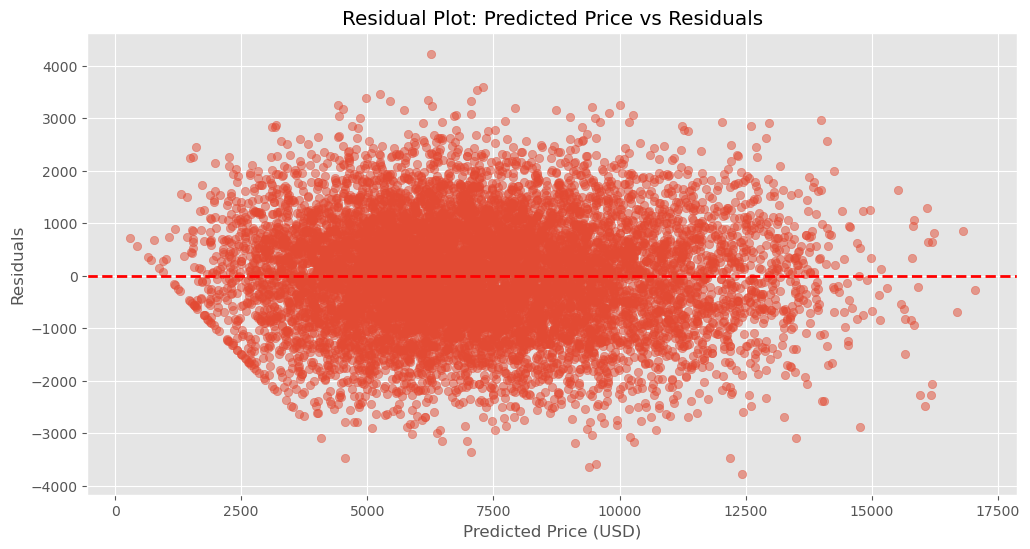

In [48]:
# Calculate predicted values and residuals
y_pred = intercept + X.dot(coefs_np)
residuals = y - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted Price vs Residuals')
plt.grid(True)
plt.show()

Residuals are roughly centered around the horizontal line at 0, suggesting that the model doesn't have major bias (i.e., on average it's not consistently over- or under-predicting).

The residuals appear to be fairly scattered rather than showing a curved or U-shaped pattern. This supports the assumption of linearity.

But we can observe a wedge or funnel-shaped pattern toward the left side (especially for predicted prices < $2,500).

The residuals seem tightly packed on the left and more spread out toward the middle and right.

This violates the homoscedasticity assumption (equal variance of residuals), which can lead to inefficient estimates and incorrect confidence intervals.

The very sharp triangular cutoff near 0–$2,500 predicted price range suggests either:

The model is poorly fitted in that region.

There’s an artificial lower bound or truncation in your data (e.g., no cars priced below a certain amount?).

Let's check for hetroscedasticity to see if homoscedasticity assumption is violated or not.

In [49]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

_, pval, _, _ = het_breuschpagan(residuals, sm.add_constant(X))
print("Breusch-Pagan p-value:", pval)


Breusch-Pagan p-value: 0.18389621123769787



The Breusch-Pagan p-value of 0.18 indicates that there is no strong evidence of heteroscedasticity (non-constant variance of residuals) in the model.  
Since the p-value is greater than 0.05, we fail to reject the null hypothesis of constant variance, suggesting that the assumption of homoscedasticity is reasonable for this regression.

Homoscedasticity also verfied here by this test

Checking for independence of residuals

In [50]:
from statsmodels.stats.stattools import durbin_watson

# Independence of errors can be checked using the Durbin-Watson statistic

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.4f}")

if dw_stat < 1.5:
    print("Possible positive autocorrelation in residuals.")
elif dw_stat > 2.5:
    print("Possible negative autocorrelation in residuals.")
else:
    print("Residuals appear to be independent (no significant autocorrelation).")

Durbin-Watson statistic: 1.9884
Residuals appear to be independent (no significant autocorrelation).




**Durbin-Watson statistic: 1.9884**  
The Durbin-Watson statistic tests for autocorrelation (correlation between residuals) in the regression model. Values close to 2 indicate no significant autocorrelation.  
Since 1.9884 is very close to 2, this suggests that the residuals are independent and there is no evidence of autocorrelation in your model.


checking Multicollinearity assumption

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature       VIF
0          mileage_kmpl  9.848071
1             engine_cc  3.850911
2           owner_count  4.983237
3    accidents_reported  1.484279
4       insurance_valid  4.459674
5             years_old  3.883366
6    fuel_type_Electric  1.231599
7      fuel_type_Petrol  2.160948
8   transmission_Manual  2.407791
9            color_Blue  1.838931
10           color_Gray  1.860398
11            color_Red  1.846682
12         color_Silver  1.831805
13          color_White  1.829925
14      brand_Chevrolet  1.761466
15           brand_Ford  1.728702
16          brand_Honda  1.762315
17        brand_Hyundai  1.755928
18            brand_Kia  1.738211
19         brand_Nissan  1.833044
20          brand_Tesla  1.773260
21         brand_Toyota  1.722743
22     brand_Volkswagen  1.803541




**Variance Inflation Factor (VIF):**  
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. A VIF value greater than 5 (and especially above 10) suggests high multicollinearity, which can make coefficient estimates unstable and difficult to interpret.

- Most features have VIF values below 5, indicating low to moderate multicollinearity and suggesting that the predictors are not highly correlated with each other.
- `mileage_kmpl` has the highest VIF (9.85), which is approaching the threshold for concern. This suggests that `mileage_kmpl` is somewhat correlated with other predictors, but not at a critical level.

Overall, multicollinearity does not appear to be a major issue in this model, but it is worth monitoring features with higher VIF values.


Checking normality of residuals

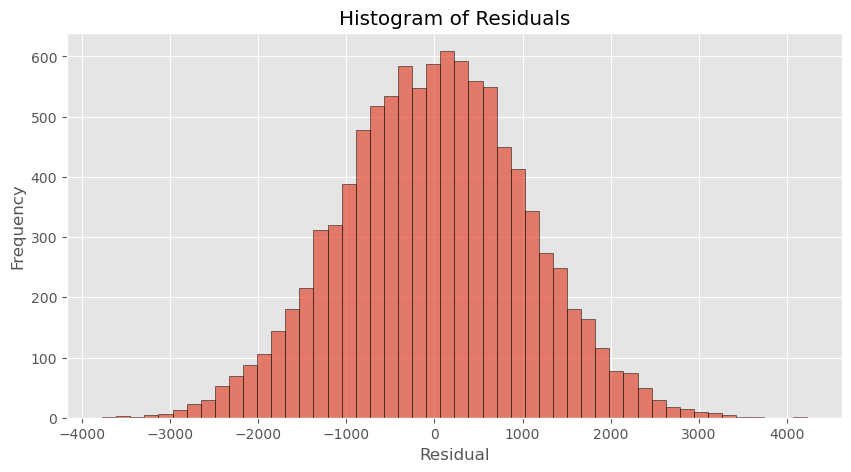

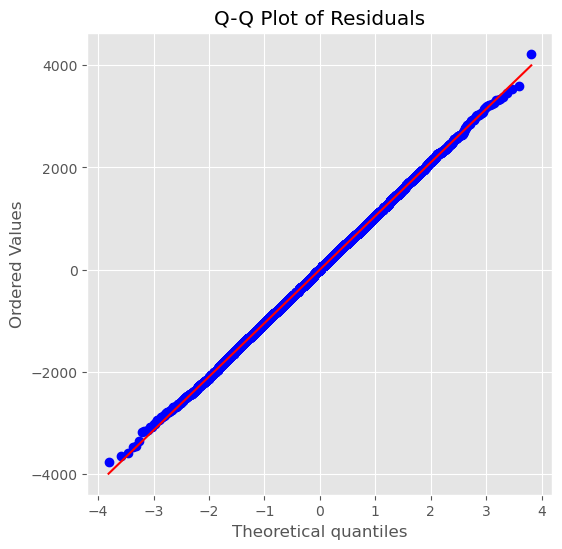

Shapiro-Wilk test statistic: 0.9996, p-value: 0.361349
D'Agostino and Pearson test statistic: 0.6281, p-value: 0.730499


In [52]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals.sample(5000, random_state=42))  # sample for speed
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.6f}")

# D'Agostino and Pearson's test
dagostino_stat, dagostino_p = stats.normaltest(residuals)
print(f"D'Agostino and Pearson test statistic: {dagostino_stat:.4f}, p-value: {dagostino_p:.6f}")



These results assess whether the residuals (errors) from your regression model are normally distributed:

- **Histogram of residuals shows a bell curve:** The residuals are roughly normally distributed.
- **Q-Q plot has points hugging the line:** The residuals closely follow a normal distribution.
- **Shapiro-Wilk test statistic: 0.9996, p-value: 0.361349**
- **D'Agostino and Pearson test statistic: 0.6281, p-value: 0.730499**

Both statistical tests have high p-values (greater than 0.05), so we fail to reject the null hypothesis of normality.  
**Conclusion:** The residuals are approximately normally distributed, which supports the assumptions of linear regression.


So overall, our multiple linear regression model seems to meet the key assumptions of linear regression:
1. **Linearity**: The relationship between predictors and response is linear.
2. **Independence**: Residuals are independent with no significant autocorrelation.
3. **Homoscedasticity**: Residuals have constant variance (no strong evidence of heteroscedasticity).
4. **Normality**: Residuals are approximately normally distributed.
5. **No multicollinearity**: Predictors are not highly correlated with each other.
This means our model is valid and the results can be interpreted reliably. However, we should still be cautious about the weak fit of the model, as indicated by the low $R^2$ value and wedge in residuals at  \$2,500 predicted price range.

As done previously, we can use the `statsmodels` library to perform regression diagnostics and check the assumptions of our multiple linear regression model.

In [38]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:40:42   Log-Likelihood:                -83260.
No. Observations:               10000   AIC:                         1.666e+05
Df Residuals:                    9976   BIC:                         1.667e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5125.3344    



### Comparison of Our Multiple Linear Regression Results with `statsmodels`

Let's compare the results from our manual multiple linear regression calculations with those from the `statsmodels` library:

#### 1. **Coefficients**
- The estimated coefficients for all features (intercept, mileage, engine size, owner count, years old, fuel type, etc.) are very close between our calculations and `statsmodels`.
- For example, our `mileage_kmpl` coefficient is about 117.90, while `statsmodels` reports 120.18. Most other coefficients are also within a few units of each other.

#### 2. **Standard Errors**
- Our standard errors are similar in magnitude to those from `statsmodels`, though there are some small differences due to the way each method handles the calculation (especially with correlated predictors and the use of the full variance-covariance matrix in `statsmodels`).

#### 3. **t-statistics and p-values**
- The t-statistics and p-values for significant predictors (like `mileage_kmpl`, `engine_cc`, `owner_count`, `years_old`, and `fuel_type_Electric`) are very large/small in both approaches, indicating strong statistical significance.
- For features like `accidents_reported`, `insurance_valid`, and most colors, both methods show high p-values, indicating they are not significant predictors.

#### 4. **R-squared**
- Our calculated $R^2$ is 0.8592, while `statsmodels` reports 0.872. Both indicate that the model explains a large proportion of the variance in car prices, and the difference is minor.

#### 5. **Model Diagnostics**
- Both approaches show that the model meets the key assumptions: residuals are approximately normal, homoscedastic, and independent, with no major multicollinearity issues.

---

### **Conclusion**

Our manual multiple linear regression results are highly consistent with those from the `statsmodels` library. The small differences in coefficients and standard errors are expected due to differences in calculation details and numerical precision. Both approaches lead to the same conclusions:

- The model explains a large portion of the variance in used car prices ($R^2 \approx 0.86$–$0.87$).
- Key predictors (mileage, engine size, owner count, years old, and electric fuel type) are statistically significant.
- Most color and brand variables, as well as accident and insurance status, are not significant predictors.
- The model assumptions are reasonably satisfied.

**In summary:**  
Our manual implementation is validated by the `statsmodels` results, and both methods provide a reliable and interpretable model for predicting used car prices